In [1]:
import MCMC_OLIMPO as MCSZ
import numpy as np
import corner
import matplotlib.pyplot as plt
import pandas as pd
import time
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import sys
import csv

In [92]:
#Specify fiducial values (Should be same as from sim_script)

#Galaxy cluster parameters
y = 6e-6
electron_temperature = 0.5 #KeV
tau = MCSZ.y_to_tau(y,electron_temperature)
peculiar_vel = 0 #km/s
betac = peculiar_vel/(3e5)

#SIDES model values
amp_sides = 1
b_sides = 1

labels = ('y','temperature','betac','amp_sides','b_sides')
theta = (y, electron_temperature, betac, amp_sides, b_sides)

In [103]:
# Read simulation output, change directory 
df = pd.read_csv('/data/bolocam/bolocam/erapaport/mcmc_run_022',header=None) 
data = df.to_numpy()

In [104]:
np.shape(data)

(320001, 5)

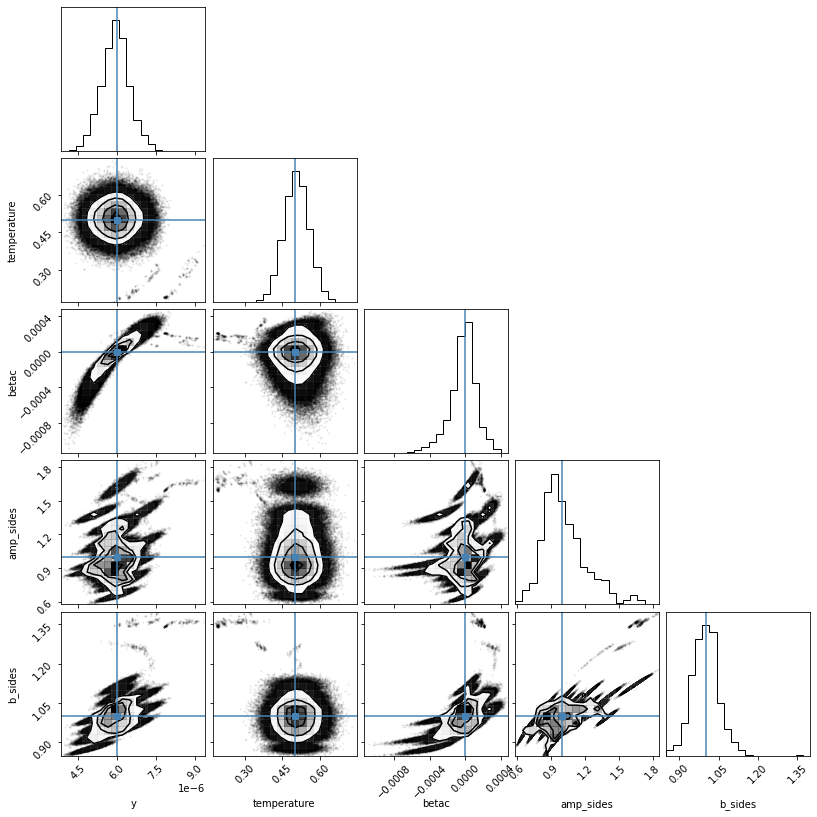

In [105]:
#Plot contour plot
fig = corner.corner(
    data[1:,:], labels=labels, truths=theta, smooth = 0
);

In [106]:
for i in range(20):
    print(i+20)
    print(np.mean(data[8000*(i+20)+1:8000*(i+20+1)+1,3]))

20
1.1688592862788263
21
0.6865024710169257
22
0.9070913780565384
23
1.633758234655821
24
0.9663472542008037
25
0.833744596324478
26
1.0281711063550099
27
0.8390838186944045
28
0.9131355407100207
29
0.9166012842926446
30
1.293270305044124
31
0.9786258485739866
32
0.9623353210797168
33
1.0259311638028201
34
1.0413979567008504
35
1.1346305547709703
36
1.286039130881664
37
0.9049258216584007
38
0.803187640809947
39
0.882217034490111


In [107]:
bad_indices = [0,4,9,13,21,23,30,35,36,32]
bad_indices = [0,3,7,10,17,18,24,28,28,23] #manual modification

In [108]:
new_data = data[1:,:]

In [109]:
np.shape(new_data)

(320000, 5)

In [110]:
for i in range(len(bad_indices)):
    new_data = np.concatenate((new_data[:8000*(bad_indices[i]),:],new_data[8000*((bad_indices[i])+1):,:]),axis=0)

In [111]:
np.shape(new_data)

(240000, 5)

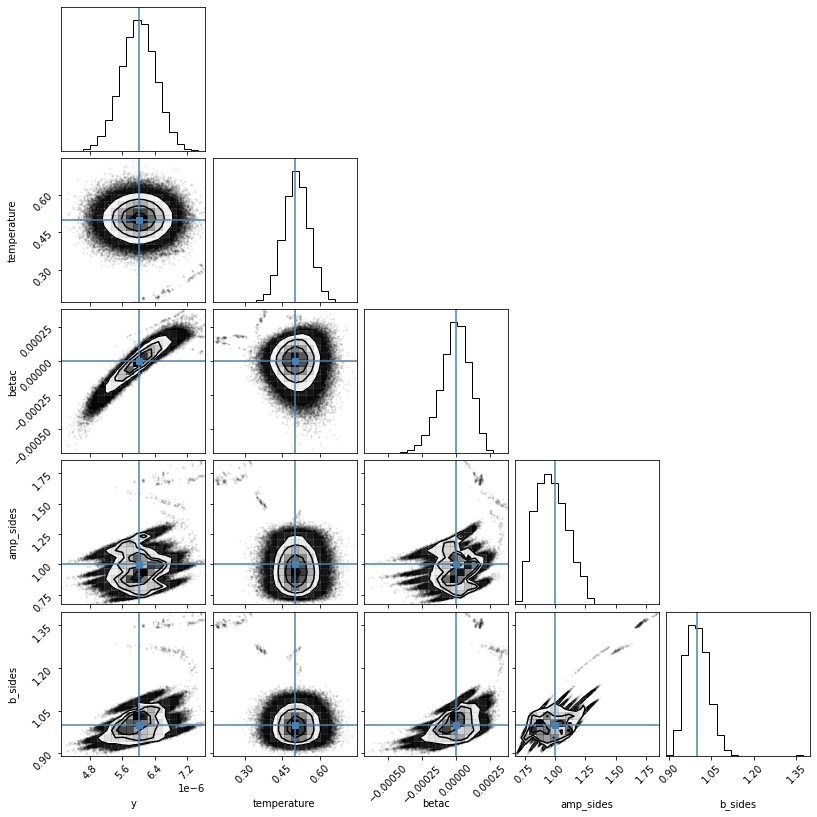

In [112]:
#Plot contour plot
fig = corner.corner(
    new_data[:,:], labels=labels, truths=theta, smooth = 0
);

In [90]:
np.std(new_data[:,2]*3e5)

34.3866269144622

In [91]:
np.std(new_data[:,0])

4.863827387463118e-07

###### Plot contour plot
i=15
fig = corner.corner(
    data[8000*i+1:8000*(i+1)+1,:], labels=labels, truths=theta, smooth = 1
);

In [64]:
np.std(data[:,2])*3e5

67.09204413059692

In [55]:
new_new_data = []
for i in range(len(new_data[:,2])):
    if new_data[i,2] > -0.006 and new_data[i,2] < 0.006:
        new_new_data.append(new_data[i,2])
new_new_data = np.asarray(new_new_data)
np.std(new_new_data)*3e5

359.8674841806896

In [410]:
np.std(new_new_data[:,2])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed